## Revisión cuantitativa y descriptiva del dataset de videos

In [ ]:
import pandas as pd
import numpy as np

# === 1. Cargar dataset limpio ===
ruta = "noticias_youtube_limpio_topicos.csv"  
df = pd.read_csv(ruta)

# === 2. DEPURACIÓN CUANTITATIVA ===
total_videos_final = len(df)
filtro_transcripcion = df['transcript'].isna().sum()
filtro_duplicados = df.duplicated(subset='transcript').sum()

print("📊 DEPURACIÓN CUANTITATIVA")
print(f"- Total de videos finales: {total_videos_final}")
print(f"- Eliminados por transcripción vacía: {filtro_transcripcion}")
print(f"- Eliminados por duplicados: {filtro_duplicados}")
print("\n" + "-"*60 + "\n")

# === 3. COBERTURA TEMPORAL Y CATEGORÍAS ===
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print("📅 COBERTURA TEMPORAL")
print(f"- Fecha mínima: {df['date'].min()}")
print(f"- Fecha máxima: {df['date'].max()}\n")

print("📁 DISTRIBUCIÓN POR CATEGORÍA")
print(df['categoria'].value_counts(normalize=True).round(3) * 100)
print("\n" + "-"*60 + "\n")


📊 DEPURACIÓN CUANTITATIVA
- Total de videos finales: 8566
- Eliminados por transcripción vacía: 0
- Eliminados por duplicados: 13

------------------------------------------------------------

📅 COBERTURA TEMPORAL
- Fecha mínima: 2023-10-07 07:03:32+00:00
- Fecha máxima: 2025-03-27 01:07:45+00:00

📁 DISTRIBUCIÓN POR CATEGORÍA
categoria
Internacional Medio Oriente    44.5
Internacional                  27.6
Palestina                      15.7
Israel                         12.2
Name: proportion, dtype: float64

------------------------------------------------------------



## Dimensiones generales del dataset

In [ ]:
# Tamaño del DataFrame
print("🔢 Tamaño del DataFrame:")
print(f"- Filas (videos): {df.shape[0]}")
print(f"- Columnas: {df.shape[1]}")


🔢 Tamaño del DataFrame:
- Filas (videos): 8566
- Columnas: 11


## Estructura del dataset: columnas y tipos de datos

In [ ]:
print("\n🧩 Columnas y tipos de datos:")
print(df.dtypes)



🧩 Columnas y tipos de datos:
video_id                      object
title                         object
channel                       object
date             datetime64[ns, UTC]
views                          int64
likes                          int64
comments                       int64
transcript                    object
url                           object
channel_clean                 object
categoria                     object
dtype: object


## Revisión de valores nulos por columna

In [ ]:
print("\n❗ Valores nulos por columna:")
print(df.isnull().sum())



❗ Valores nulos por columna:
video_id         0
title            0
channel          0
date             0
views            0
likes            0
comments         0
transcript       0
url              0
channel_clean    0
categoria        0
dtype: int64


## Identificación de duplicados por transcripción y distribución por categoría

In [ ]:
# Filas duplicadas a eliminar (excluye la primera aparición de cada texto duplicado)
duplicados_eliminar = df[df.duplicated(subset='transcript', keep='first')]

# Contar cuántos de esos 13 pertenecen a cada categoría
conteo_duplicados_categoria = duplicados_eliminar['categoria'].value_counts()

print("📌 Duplicados a eliminar por categoría (13 filas):")
print(conteo_duplicados_categoria)

duplicados_eliminar[['video_id', 'title', 'categoria', 'date']].sort_values(by='categoria')


📌 Duplicados a eliminar por categoría (13 filas):
categoria
Palestina                      11
Internacional Medio Oriente     2
Name: count, dtype: int64


,video_id,title,categoria,date
1848,dvp-FTSASLY,British MP Jeremy Corbyn Stands in Solidarity ...,Internacional Medio Oriente,2024-01-13 13:39:52+00:00
4499,ErmaUmsOhwI,‘Makes them war criminals’: Cornel West slams ...,Internacional Medio Oriente,2024-07-22 12:02:14+00:00
4348,XeTdxM5vOOU,Addressing the &quot;From the River to the Sea...,Palestina,2024-07-11 00:04:40+00:00
5201,KnIHpbcf6XY,Intensified Aerial Strikes: The Israeli Milita...,Palestina,2024-08-29 06:01:31+00:00
5573,ttMXJmLxlps,Understanding the Greater Israel Concept: Myth...,Palestina,2024-09-20 14:03:32+00:00
5577,gL2RLIm4fb0,Netanyahu&#39;s Betrayal: The Truth About Gaza...,Palestina,2024-09-20 22:01:30+00:00
6706,9gb0lQLRRZ4,Speaking Out: Condemning Israel&#39;s Actions ...,Palestina,2024-11-22 13:00:40+00:00
6707,cBE1stfqNxQ,Speaking Out: Condemning Israel&#39;s Actions ...,Palestina,2024-11-22 13:00:41+00:00
8502,URisYBoBuQk,The Only Legal Path to Israeli-Palestinian Peace,Palestina,2025-03-22 21:55:25+00:00
8505,MDn93TY-_xY,Hamas: Analyzing Military Discipline and Recen...,Palestina,2025-03-23 00:04:28+00:00


## Eliminación de duplicados y guardado del dataset limpio

In [ ]:
import pandas as pd


# Eliminar duplicados en la columna 'transcript', conservando la primera aparición
df_sin_duplicados = df.drop_duplicates(subset='transcript', keep='first')

# Confirmar el nuevo tamaño
print(f"✔️ Total de filas después de eliminar duplicados: {len(df_sin_duplicados)}")

# Guardar nuevo archivo
df_sin_duplicados.to_csv("noticias_youtube_sin_duplicados.csv", index=False)
print("✅ Archivo guardado como 'noticias_youtube_sin_duplicados.csv'")


✔️ Total de filas después de eliminar duplicados: 8553
✅ Archivo guardado como 'noticias_youtube_sin_duplicados.csv'


## Análisis del engagement en videos por categoría

✔️ Dataset cargado: 8566 filas, 12 columnas
Categorías disponibles:
categoria
Internacional Medio Oriente    3814
Internacional                  2364
Palestina                      1345
Israel                         1043
Name: count, dtype: int64

------------------------------------------------------------

📊 Estadísticas de engagement por categoría:
                             promedio_views  promedio_likes  \
categoria                                                     
Internacional                     115725.02         1236.27   
Internacional Medio Oriente       132931.74         6685.07   
Israel                             77771.52         2536.16   
Palestina                          27367.09         1800.30   

                             promedio_comments  promedio_engagement_rate  \
categoria                                                                  
Internacional                           781.00                      0.02   
Internacional Medio Oriente           

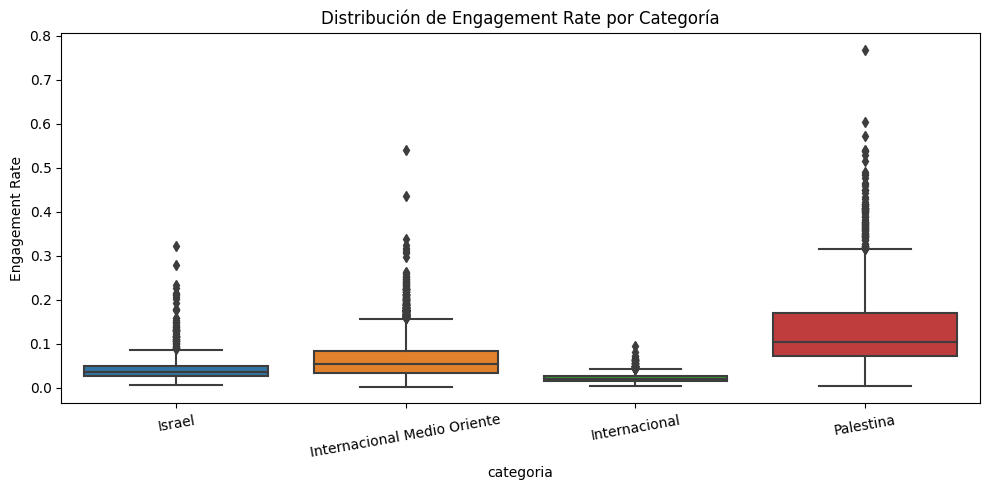

🚨 Outliers detectados:
- Views extremos: 989
- Likes extremos: 1033
- Comments extremos: 982

------------------------------------------------------------

🔥 Top 5 videos con mayor engagement:
                                                  title  views  likes  \
8353      Palestine Crisis: A Wake-Up Call for Humanity    276    209   
8419  The Truth Exposed: Gaza&#39;s Impact on Global...    268    156   
8358  The Unwritten Rules of Conflict: Civilians&#39...    241    137   
8331  Historic Academy Award Win: First Palestinians...    246    131   
8181  Protesters march to US embassy in Dublin over ...   1416    737   

      comments  engagement_rate                    categoria  
8353         3         0.768116                    Palestina  
8419         6         0.604478                    Palestina  
8358         1         0.572614                    Palestina  
8331         2         0.540650                    Palestina  
8181        28         0.540254  Internacional Medio 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Verificación rápida del tamaño
print(f"✔️ Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"Categorías disponibles:\n{df['categoria'].value_counts()}")
print("\n" + "-"*60 + "\n")

# === 2. Calcular engagement rate ===
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']
df['engagement_rate'] = df['engagement_rate'].replace([np.inf, -np.inf], np.nan).fillna(0)

# === 3. Estadísticas por categoría ===
engagement_stats = df.groupby('categoria').agg(
    promedio_views=('views', 'mean'),
    promedio_likes=('likes', 'mean'),
    promedio_comments=('comments', 'mean'),
    promedio_engagement_rate=('engagement_rate', 'mean'),
    mediana_engagement_rate=('engagement_rate', 'median')
).round(2)

print("📊 Estadísticas de engagement por categoría:")
print(engagement_stats)
print("\n" + "-"*60 + "\n")

# === 4. Distribución visual de engagement_rate ===
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='categoria', y='engagement_rate')
plt.title("Distribución de Engagement Rate por Categoría")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

# === 5. Detección de outliers en views, likes, comments ===
def detectar_outliers(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    umbral_sup = q3 + 1.5 * iqr
    return df[df[col] > umbral_sup]

outliers_views = detectar_outliers('views')
outliers_likes = detectar_outliers('likes')
outliers_comments = detectar_outliers('comments')

print(f"🚨 Outliers detectados:")
print(f"- Views extremos: {len(outliers_views)}")
print(f"- Likes extremos: {len(outliers_likes)}")
print(f"- Comments extremos: {len(outliers_comments)}")
print("\n" + "-"*60 + "\n")

# === 6. Top y bottom 5 videos por engagement ===
top_engagement = df.sort_values('engagement_rate', ascending=False).head(5)
bottom_engagement = df.sort_values('engagement_rate', ascending=True).head(5)

print("🔥 Top 5 videos con mayor engagement:")
print(top_engagement[['title', 'views', 'likes', 'comments', 'engagement_rate', 'categoria']])
print("\n🧊 Bottom 5 videos con menor engagement:")
print(bottom_engagement[['title', 'views', 'likes', 'comments', 'engagement_rate', 'categoria']])

engagement_stats.to_csv("engagement_por_categoria.csv")


## Detección automática de idioma en transcripciones

In [ ]:
!pip install langdetect
from langdetect import detect
import pandas as pd
from tqdm import tqdm

# Activar barra de progreso
tqdm.pandas()

# Cargar dataset limpio (o el que quieras analizar)
df = pd.read_csv("noticias_youtube_sin_duplicados.csv")

# Función para detectar idioma
def detectar_idioma(texto):
    try:
        return detect(str(texto))
    except:
        return "unknown"

# Aplicar función sobre la columna de transcripciones
df['idioma'] = df['transcript'].progress_apply(detectar_idioma)

# Ver resumen
print(df['idioma'].value_counts())

# Guardar dataset con columna de idioma agregada
df.to_csv("noticias_youtube_con_idioma.csv", index=False)
print("✅ Archivo guardado como 'noticias_youtube_con_idioma.csv'")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=001859cf395da1e7c4c5fd75a16d2dd35e6c788f7b7dc7d5f6e8229311caa683
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


100%|██████████| 8553/8553 [01:17<00:00, 110.33it/s]


idioma
en    8543
af       3
so       3
id       1
es       1
sw       1
fr       1
Name: count, dtype: int64
✅ Archivo guardado como 'noticias_youtube_con_idioma.csv'


## Análisis de registros con transcripciones en idiomas distintos al inglés

In [ ]:
import pandas as pd

# Cargar el archivo con la columna de idioma
df = pd.read_csv("noticias_youtube_con_idioma.csv")

# Filtrar registros cuyo idioma no es 'en'
no_ingles = df[df['idioma'] != 'en']

# Mostrar cuántos son por categoría
conteo_por_categoria = no_ingles['categoria'].value_counts()

print("📌 Registros no ingleses por categoría:")
print(conteo_por_categoria)

# Opcional: ver detalles de los videos no ingleses
print("\n🎥 Detalles de los 10 registros no ingleses:")
print(no_ingles[['video_id', 'title', 'idioma', 'categoria', 'date']])


📌 Registros no ingleses por categoría:
categoria
Internacional Medio Oriente    10
Name: count, dtype: int64

🎥 Detalles de los 10 registros no ingleses:
         video_id                                              title idioma  \
478   hMQESjbu43A  Large rally held in Copenhagen in solidarity w...     af   
1288  3WPjIZP6sZw  Israeli soldiers cheer after striking a UNRWA ...     so   
1533  1xiulBAWEzg  Israeli protesters call for a ‘blue and white ...     id   
1597  IjjFt-DyRNE  Thousands gather in New York to protest killin...     af   
1732  9O8HR7RMOCU   Thousands in Copenhagen demand ceasefire in Gaza     af   
1848  lg6Sz28D_aQ       Protest in Amsterdam honouring Gaza children     so   
1849  DS7M6wiOg0U  Global day of action: Pro-Palestine protesters...     es   
2073  Dw9jzPoOMHA  Israeli tanks open fire at civilians’ houses i...     sw   
4161  Jk1EcR7NMlc  Pro-Palestinian protesters confront US State D...     so   
5347  9i3bVenBToc  Danish police arrest Greta Thunberg a

## Verificación de calidad y detección de anomalías en el dataset


In [ ]:
import pandas as pd

# Cargar el CSV más reciente
df = pd.read_csv("noticias_youtube_con_idioma.csv")

# === 1. Verificar valores nulos ===
print("❗ Valores nulos por columna:")
print(df.isnull().sum())
print("\n" + "-"*50 + "\n")

# === 2. Verificar si hay likes > views ===
likes_mayores_que_views = df[df['likes'] > df['views']]
print(f"📌 Registros con likes > views: {len(likes_mayores_que_views)}")

# Opcional: mostrar algunos
if not likes_mayores_que_views.empty:
    print(likes_mayores_que_views[['video_id', 'title', 'views', 'likes']].head())

print("\n" + "-"*50 + "\n")

# === 3. Verificar videos con comments = 0 pero views altas (>100,000) ===
videos_sin_comentarios_pero_virales = df[(df['comments'] == 0) & (df['views'] > 100_000)]
print(f"📌 Videos con 0 comentarios pero más de 100k views: {len(videos_sin_comentarios_pero_virales)}")

if not videos_sin_comentarios_pero_virales.empty:
    print(videos_sin_comentarios_pero_virales[['video_id', 'title', 'views', 'comments']].head())

print("\n" + "-"*50 + "\n")

# === 4. Canales sobre-representados (top 10 canales con más videos) ===
canales_mas_frecuentes = df['channel_clean'].value_counts().head(10)
print("📊 Top 10 canales más frecuentes en el dataset:")
print(canales_mas_frecuentes)


❗ Valores nulos por columna:
video_id         0
title            0
channel          0
date             0
views            0
likes            0
comments         0
transcript       0
url              0
channel_clean    0
categoria        0
idioma           0
dtype: int64

--------------------------------------------------

📌 Registros con likes > views: 0

--------------------------------------------------

📌 Videos con 0 comentarios pero más de 100k views: 0

--------------------------------------------------

📊 Top 10 canales más frecuentes en el dataset:
channel_clean
al jazeera             1747
trt world              1110
france 24              1048
middle east eye         781
voices for gaza         747
dw news                 581
i24news                 499
bbc                     496
iltv                    395
electronic intifada     393
Name: count, dtype: int64


## Análisis de longitud y vocabulario de las transcripciones originales

📏 Longitud de transcripciones (texto crudo):
- Promedio: 1592.36 palabras
- Mediana: 424.00 palabras
- Mínima: 1 palabras
- Máxima: 108237 palabras


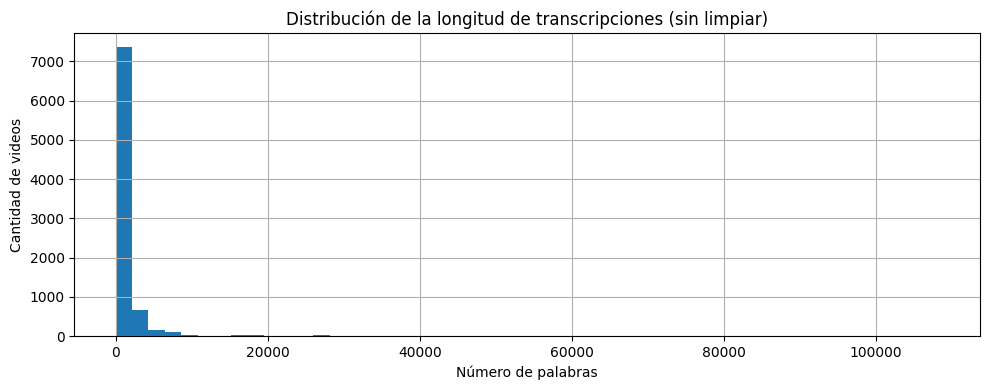


📊 Longitud promedio por categoría:
categoria
Internacional                  1252.10
Internacional Medio Oriente     795.91
Israel                         4234.56
Palestina                      2405.42
Name: longitud_transcript, dtype: float64

📚 Tamaño del vocabulario bruto (sin limpieza): 104,129 palabras únicas
- Promedio por video: 12.17 palabras únicas por video


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset
df = pd.read_csv("noticias_youtube_con_idioma.csv")

# === 1. Longitud de la transcripción original (en número de palabras) ===
df['longitud_transcript'] = df['transcript'].astype(str).apply(lambda x: len(x.split()))

print("📏 Longitud de transcripciones (texto crudo):")
print(f"- Promedio: {df['longitud_transcript'].mean():.2f} palabras")
print(f"- Mediana: {df['longitud_transcript'].median():.2f} palabras")
print(f"- Mínima: {df['longitud_transcript'].min()} palabras")
print(f"- Máxima: {df['longitud_transcript'].max()} palabras")

# === 2. Histograma de distribución ===
plt.figure(figsize=(10, 4))
df['longitud_transcript'].hist(bins=50)
plt.title("Distribución de la longitud de transcripciones (sin limpiar)")
plt.xlabel("Número de palabras")
plt.ylabel("Cantidad de videos")
plt.tight_layout()
plt.show()

# === 3. Longitud promedio por categoría ===
longitud_por_categoria = df.groupby('categoria')['longitud_transcript'].mean().round(2)
print("\n📊 Longitud promedio por categoría:")
print(longitud_por_categoria)

# === 4. Vocabulario bruto ===
vocab_bruto = set(" ".join(df['transcript'].astype(str)).split())
print(f"\n📚 Tamaño del vocabulario bruto (sin limpieza): {len(vocab_bruto):,} palabras únicas")
print(f"- Promedio por video: {len(vocab_bruto) / df.shape[0]:.2f} palabras únicas por video")

## Detección de transcripciones anormalmente cortas (outliers inferiores)

In [ ]:
import pandas as pd

# Cargar dataset
df = pd.read_csv("noticias_youtube_con_idioma.csv")

# Calcular longitud si aún no lo has hecho
df['longitud_transcript'] = df['transcript'].astype(str).apply(lambda x: len(x.split()))

# === 1. Ver percentiles clave ===
percentiles = df['longitud_transcript'].quantile([0.01, 0.05, 0.10, 0.25]).round(2)
print("📊 Percentiles de longitud de transcripciones:")
print(percentiles)

# === 2. Revisar ejemplos por debajo del percentil 5% (por ejemplo) ===
umbral = percentiles.loc[0.05]
transcripciones_cortas = df[df['longitud_transcript'] <= umbral]

print(f"\n📌 Transcripciones con ≤ {int(umbral)} palabras ({len(transcripciones_cortas)} registros):")
print(transcripciones_cortas[['video_id', 'title', 'longitud_transcript', 'transcript', 'categoria']].head(10))


📊 Percentiles de longitud de transcripciones:
0.01     24.0
0.05     54.0
0.10     78.0
0.25    223.0
Name: longitud_transcript, dtype: float64

📌 Transcripciones con ≤ 54 palabras (434 registros):
        video_id                                              title  \
23   q4jhrDteWHU  Israel Palestine Conflict: Turkish President E...   
38   8r_7_Ir0-mE  Pro-Palestine Americans protest in front of th...   
69   luMUmEOnhmo                    Meta bans pro-Palestine content   
119  7wAz289RFUc  Journalist bursts into tears while reporting i...   
140  PkZjq0jFLxI  How does von der Leyen’s stance on Ukrainian a...   
142  Gnh8EDAXcoE  ‘Just as ISIS was crushed, so too will Hamas b...   
209  ICE4s29Osuk  Cambridge University students and the public r...   
223  FtFa4roOj4w  Anna Foster was reporting live from the Israel...   
238  Ya8iwhsPiBY  #Hamas prevents #Palestinians from fleeing. He...   
300  Y191HOmHv1Y  Joe Biden understands that Hamas must be eradi...   

     longitud_transc

## Extracción de transcripciones en el percentil 1% por longitud (≤ 24 palabras)

In [ ]:
import pandas as pd

# === 1. Cargar el dataset ===
ruta = "noticias_youtube_con_idioma.csv"  # Ajusta si el archivo está en otra carpeta
df = pd.read_csv(ruta)

# === 2. Calcular longitud de transcripción (si no está calculada) ===
df['longitud_transcript'] = df['transcript'].astype(str).apply(lambda x: len(x.split()))

# === 3. Filtrar registros con ≤ 24 palabras (percentil 1%) ===
df_p01 = df[df['longitud_transcript'] <= 24].copy()

# === 4. Ver cuántos son y mostrar los primeros 10 ===
print(f"📌 Total de registros en el percentil 1% (≤ 24 palabras): {len(df_p01)}\n")
print(df_p01[['video_id', 'title', 'longitud_transcript', 'transcript', 'categoria']].head(10))

# === (Opcional) Guardar a CSV para revisión detallada ===
df_p01.to_csv("transcripciones_percentil_01.csv", index=False)
print("✅ Archivo guardado como 'transcripciones_percentil_01.csv'")


📌 Total de registros en el percentil 1% (≤ 24 palabras): 89

         video_id                                              title  \
69    luMUmEOnhmo                    Meta bans pro-Palestine content   
209   ICE4s29Osuk  Cambridge University students and the public r...   
306   CBMtHTkuFf4            What really happened in Gaza: #hospital   
476   PDorXFq1yYg  Hamas is a genocidal terrorist organization, t...   
478   hMQESjbu43A  Large rally held in Copenhagen in solidarity w...   
616   fHYVdWV0gew    Incendiary bombs rain down on Gaza | AJ #shorts   
912   6kpVnn0Wm6g  Doctors in Gaza use flashlights to conduct sur...   
919   r4mBMYd1z6g  Largest pro-Palestinian rally held in London |...   
1235  kb5Sk-GYLp0  Sirens blare in Spanish civil war town of Guer...   
1248  pRePDtsIgZw  Occupied East Jerusalem shops heed the global ...   

      longitud_transcript                                         transcript  \
69                      6       [Music] [Music] [Music] [Music] ye

## Distribución por categoría de transcripciones extremadamente cortas (≤ 24 palabras)

In [ ]:
import pandas as pd

# Cargar el dataset (si no está cargado)
df = pd.read_csv("noticias_youtube_con_idioma.csv")

# Calcular longitud si no se ha hecho
df['longitud_transcript'] = df['transcript'].astype(str).apply(lambda x: len(x.split()))

# Filtrar los registros del percentil 1 (≤ 24 palabras)
df_p01 = df[df['longitud_transcript'] <= 24]

# Contar cuántos hay por categoría
conteo_categorias_p01 = df_p01['categoria'].value_counts()

# Mostrar resultado
print("📊 Distribución por categoría de los registros ≤ 24 palabras:")
print(conteo_categorias_p01)


📊 Distribución por categoría de los registros ≤ 24 palabras:
categoria
Internacional Medio Oriente    75
Palestina                       7
Israel                          6
Internacional                   1
Name: count, dtype: int64


##  Filtrado de corpus: eliminación de transcripciones muy breves (≤ 24 palabras)

In [ ]:
import pandas as pd

# 1. Cargar el dataset original
df = pd.read_csv("noticias_youtube_con_idioma.csv")

# 2. Calcular la longitud de las transcripciones
df['longitud_transcript'] = df['transcript'].astype(str).apply(lambda x: len(x.split()))

# 3. Filtrar corpus: conservar solo transcripciones con más de 24 palabras
df_filtrado = df[df['longitud_transcript'] > 24].copy()

# 4. Guardar nuevo archivo limpio
df_filtrado.to_csv("noticias_youtube_filtrado_min_25.csv", index=False)

# 5. Confirmar
print(f"✅ Corpus limpio guardado: {len(df_filtrado)} registros")
print("📁 Archivo: noticias_youtube_filtrado_min_25.csv")


✅ Corpus limpio guardado: 8464 registros
📁 Archivo: noticias_youtube_filtrado_min_25.csv


## Visualización de la distribución de videos por categoría narrativa

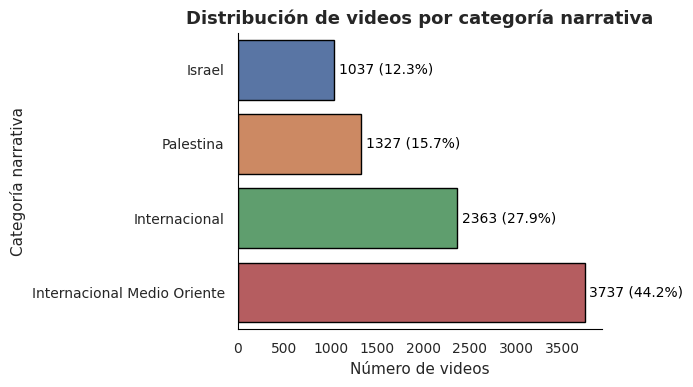

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# === 1. Cargar datos ===
df = pd.read_csv("noticias_youtube_filtrado_min_25.csv")

# === 2. Configuración del estilo ===
sns.set_theme(style="white")
rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 11,
    'axes.titlesize': 13,
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.edgecolor': 'black',
    'axes.linewidth': 0.8,
    'legend.fontsize': 10
})

# === 3. Preparar tabla resumen ===
conteo_categoria = df['categoria'].value_counts().reset_index()
conteo_categoria.columns = ['Categoría', 'Cantidad']
conteo_categoria['Porcentaje'] = (conteo_categoria['Cantidad'] / conteo_categoria['Cantidad'].sum() * 100).round(1)
conteo_categoria['Etiqueta'] = conteo_categoria.apply(
    lambda x: f"{x['Cantidad']} ({x['Porcentaje']}%)", axis=1
)
conteo_categoria = conteo_categoria.sort_values('Cantidad', ascending=True)

# === 4. Gráfico horizontal ===
plt.figure(figsize=(7, 4))
ax = sns.barplot(
    data=conteo_categoria,
    x='Cantidad',
    y='Categoría',
    palette=sns.color_palette("deep"),
    edgecolor='black'
)

# === 5. Etiquetas al final de cada barra ===
for i, (valor, etiqueta) in enumerate(zip(conteo_categoria['Cantidad'], conteo_categoria['Etiqueta'])):
    ax.text(valor + 50, i, etiqueta, color='black', va='center', fontsize=10)

# === 6. Títulos y estilo ===
plt.title("Distribución de videos por categoría narrativa", weight='bold')
plt.xlabel("Número de videos")
plt.ylabel("Categoría narrativa")
sns.despine()
plt.grid(False)
plt.tight_layout()

# === 7. Guardar y mostrar ===
plt.savefig("distribucion_categorias_narrativas.png", dpi=300)
plt.show()



## Distribución de videos por canal dentro de cada categoría narrativa

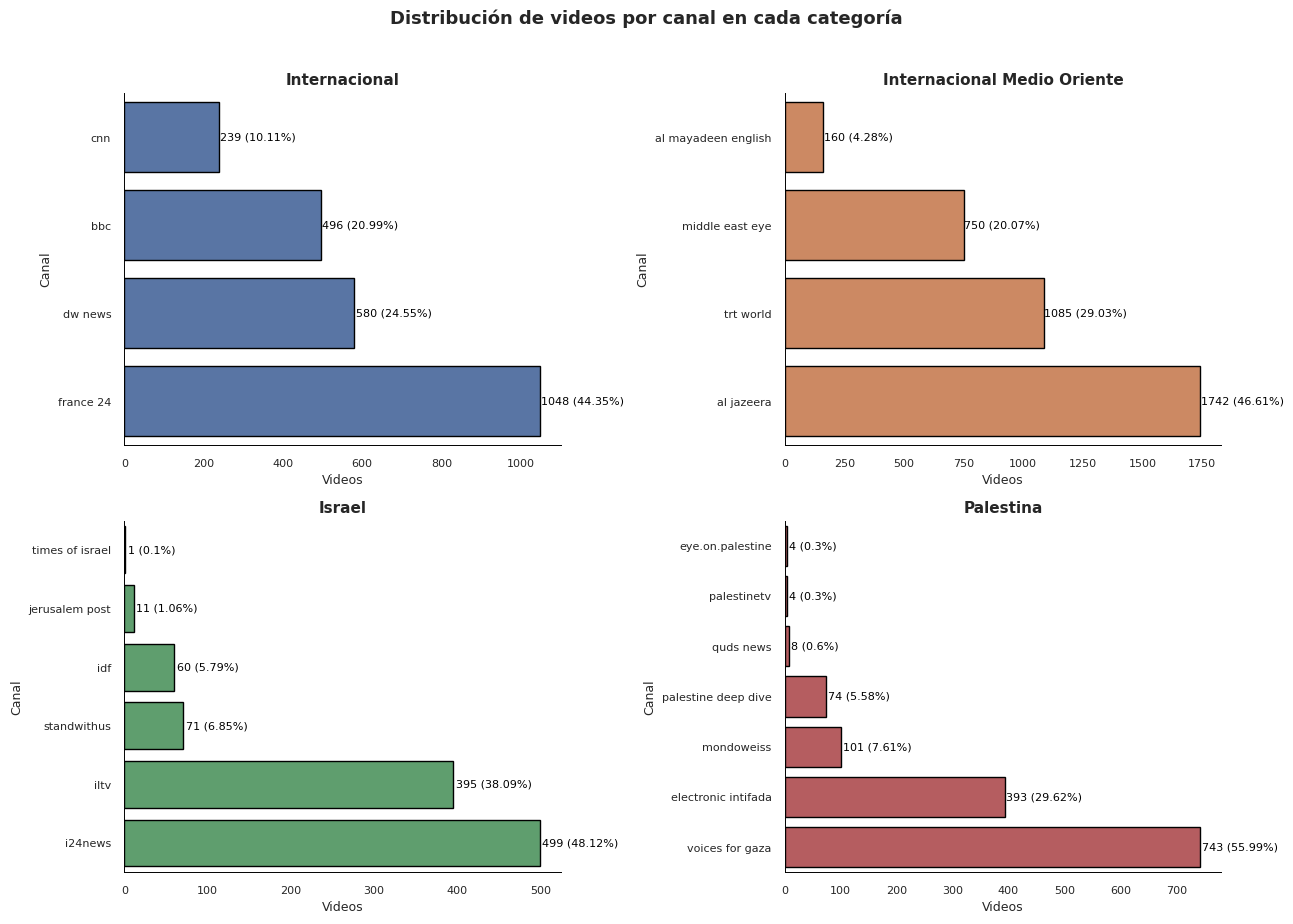

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# === CONFIGURACIÓN DE ESTILO ===
sns.set_theme(style="white")
rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 9,
    'axes.titlesize': 11,
    'axes.labelsize': 9,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'axes.edgecolor': 'black',
    'axes.linewidth': 0.7,
    'legend.fontsize': 8
})

# === CARGAR DATA ===
df = pd.read_csv("noticias_youtube_filtrado_min_25.csv")

# === AGRUPACIÓN ===
conteo = df.groupby(['categoria', 'channel_clean']).size().reset_index(name='conteo')
conteo['porcentaje'] = (conteo['conteo'] / conteo.groupby('categoria')['conteo'].transform('sum') * 100).round(2)

# === LISTA DE CATEGORÍAS ===
categorias = sorted(conteo['categoria'].unique())
color_map = dict(zip(categorias, sns.color_palette("deep")))

# === CREAR FIGURA 2x2 ===
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
axes = axes.flatten()

for i, cat in enumerate(categorias):
    ax = axes[i]
    subset = conteo[conteo['categoria'] == cat].sort_values('conteo', ascending=True)

    sns.barplot(
        data=subset,
        x='conteo',
        y='channel_clean',
        color=color_map[cat],
        edgecolor='black',
        ax=ax
    )

    for j, (valor, pct) in enumerate(zip(subset['conteo'], subset['porcentaje'])):
        etiqueta = f"{valor} ({pct}%)"
        ax.text(valor + 3, j, etiqueta, color='black', va='center', fontsize=8)

    ax.set_title(cat, fontsize=11, weight='bold')
    ax.set_xlabel("Videos")
    ax.set_ylabel("Canal")
    ax.grid(False)
    sns.despine(ax=ax)

# Título global
plt.suptitle("Distribución de videos por canal en cada categoría", fontsize=13, weight='bold', y=1.02)
plt.tight_layout()
plt.savefig("output_canales_por_categoria/distribucion_2x2_canales.png", dpi=300, bbox_inches='tight')
plt.show()



##  Distribución general del corpus por categoría narrativa

In [ ]:
import pandas as pd

# Cargar el dataset filtrado
df = pd.read_csv("noticias_youtube_filtrado_min_25.csv")

# Calcular distribución por categoría (absoluto y relativo)
conteo_categorias = df['categoria'].value_counts()
proporcion_categorias = df['categoria'].value_counts(normalize=True).round(4) * 100

# Mostrar resultados
print("📊 Distribución por categoría (frecuencia absoluta):")
print(conteo_categorias)

print("\n📊 Distribución por categoría (porcentaje):")
print(proporcion_categorias)


📊 Distribución por categoría (frecuencia absoluta):
categoria
Internacional Medio Oriente    3737
Internacional                  2363
Palestina                      1327
Israel                         1037
Name: count, dtype: int64

📊 Distribución por categoría (porcentaje):
categoria
Internacional Medio Oriente    44.15
Internacional                  27.92
Palestina                      15.68
Israel                         12.25
Name: proportion, dtype: float64


## Análisis temporal de la cobertura noticiosa en YouTube

/tmp/ipykernel_30/2094245080.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['mes'] = df['date'].dt.to_period('M')


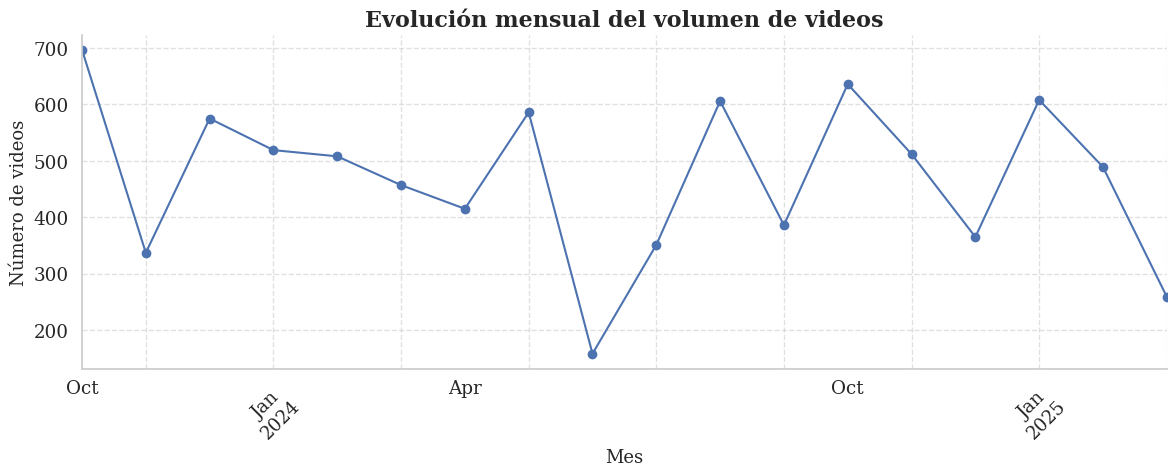

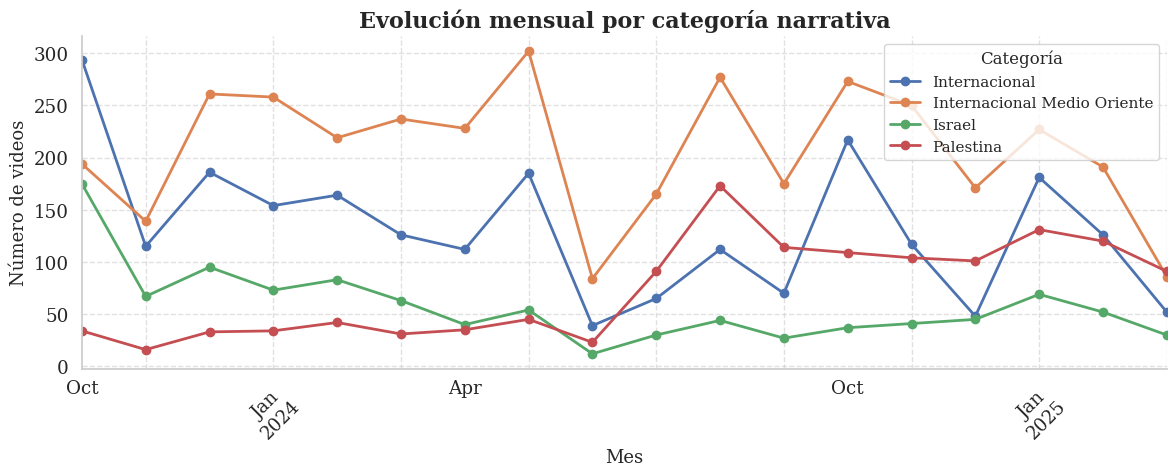

🔥 Top 10 fechas con mayor número de videos:
fecha
2025-02-05    44
2023-10-23    38
2023-10-16    36
2023-10-15    36
2023-10-18    36
2025-01-16    33
2025-01-19    33
2023-10-12    33
2024-08-29    33
2025-03-18    33
dtype: int64
📁 Archivo guardado: resumen_videos_por_mes_categoria.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# === 0. Estilo visual general ===
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'DejaVu Serif'  # Elegante y legible para papers
colors = sns.color_palette("deep")

# === 1. Cargar y preparar dataset ===
df = pd.read_csv("noticias_youtube_filtrado_min_25.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['mes'] = df['date'].dt.to_period('M')
df['fecha'] = df['date'].dt.date

# === 2. Total de videos por mes ===
videos_por_mes = df.groupby('mes').size()

fig, ax = plt.subplots(figsize=(12, 5))
videos_por_mes.plot(marker='o', linestyle='-', color=colors[0], ax=ax)
ax.set_title("Evolución mensual del volumen de videos", fontsize=16, weight='bold')
ax.set_xlabel("Mes", fontsize=13)
ax.set_ylabel("Número de videos", fontsize=13)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
# plt.savefig("total_videos_por_mes.png", dpi=300)
plt.show()

# === 3. Total de videos por mes y categoría ===
videos_mes_categoria = df.groupby(['mes', 'categoria']).size().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(12, 5))
videos_mes_categoria.plot(marker='o', ax=ax, linewidth=2)

ax.set_title("Evolución mensual por categoría narrativa", fontsize=16, weight='bold')
ax.set_xlabel("Mes", fontsize=13)
ax.set_ylabel("Número de videos", fontsize=13)
ax.legend(title="Categoría", fontsize=11, title_fontsize=12)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
# plt.savefig("videos_por_mes_categoria.png", dpi=300)
plt.show()

# === 4. Picos informativos diarios ===
picos_diarios = df.groupby('fecha').size().sort_values(ascending=False).head(10)

print("🔥 Top 10 fechas con mayor número de videos:")
print(picos_diarios)

# === 5. Exportar resumen mensual (opcional) ===
videos_mes_categoria.to_csv("resumen_videos_por_mes_categoria.csv")
print("📁 Archivo guardado: resumen_videos_por_mes_categoria.csv")


## Top 10 canales con más videos

In [ ]:
top_canales = df['channel_clean'].value_counts().head(10)
print("🎥 Top 10 canales con más videos:")
print(top_canales)


🎥 Top 10 canales con más videos:
channel_clean
al jazeera             1742
trt world              1085
france 24              1048
middle east eye         750
voices for gaza         743
dw news                 580
i24news                 499
bbc                     496
iltv                    395
electronic intifada     393
Name: count, dtype: int64


## Identificación de canales más representativos por categoría narrativa

In [ ]:
canales_categoria = df.groupby(['categoria', 'channel_clean']).size().reset_index(name='cantidad')
canales_categoria_top = canales_categoria.sort_values(by='cantidad', ascending=False)

print("\n🌎 Canales más representativos por categoría:")
for cat in df['categoria'].unique():
    print(f"\n🗂 {cat}:")
    top_cat = canales_categoria_top[canales_categoria_top['categoria'] == cat].head(5)
    print(top_cat[['channel_clean', 'cantidad']])



🌎 Canales más representativos por categoría:

🗂 Israel:
     channel_clean  cantidad
8          i24news       499
10            iltv       395
12     standwithus        71
9              idf        60
11  jerusalem post        11

🗂 Internacional Medio Oriente:
         channel_clean  cantidad
4           al jazeera      1742
7            trt world      1085
6      middle east eye       750
5  al mayadeen english       160

🗂 Internacional:
  channel_clean  cantidad
3     france 24      1048
2       dw news       580
0           bbc       496
1           cnn       239

🗂 Palestina:
          channel_clean  cantidad
20      voices for gaza       743
14  electronic intifada       393
16           mondoweiss       101
17  palestine deep dive        74
19            quds news         8


## Top 10 canales con mayor engagement promedio (mínimo 10 videos)

In [ ]:
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']

engagement_por_canal = df.groupby('channel_clean').agg(
    videos=('video_id', 'count'),
    promedio_views=('views', 'mean'),
    promedio_likes=('likes', 'mean'),
    promedio_comments=('comments', 'mean'),
    promedio_engagement=('engagement_rate', 'mean')
).round(3).sort_values(by='promedio_engagement', ascending=False)

# Ver top 10 canales con mayor engagement promedio
top_engagement = engagement_por_canal[engagement_por_canal['videos'] >= 10].head(10)  # Filtramos solo canales con al menos 10 videos
print("📈 Top 10 canales con mayor engagement promedio (mín. 10 videos):")
print(top_engagement)


📈 Top 10 canales con mayor engagement promedio (mín. 10 videos):
                     videos  promedio_views  promedio_likes  \
channel_clean                                                 
voices for gaza         743        4877.494         382.213   
al mayadeen english     160       11164.531         880.806   
mondoweiss              101       95893.594        6648.376   
palestine deep dive      74       45370.284        2746.473   
standwithus              71       96775.408        4488.887   
electronic intifada     393       50884.486        3173.438   
idf                      60      384908.033       20132.133   
middle east eye         750      180848.560       11659.007   
trt world              1085      175555.324       10511.418   
jerusalem post           11         828.455          65.000   

                     promedio_comments  promedio_engagement  
channel_clean                                                
voices for gaza                 22.803                